In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import pathlib
import seaborn as sns
import pandas as pd
sns.set_context('talk')
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
path_list = [
    # "/storage/vbutoi/scratch/ESE/training/09_15_24_ISLES_3D_Dice_wAUG",
    "/storage/vbutoi/scratch/ESE/calibration/09_20_24_ISLES_3D_BIG_noA_wNORM",
    "/storage/vbutoi/scratch/ESE/calibration/09_24_24_ISLES_3D_BIG_MOREAUG",
]

df_list = []
for path in path_list:
    try:
        dfc = rs.load_configs(
            path,
            properties=False,
        )
        df = rs.load_metrics(dfc)
        df_list.append(df)
    except Exception as e:
        print(e)
df = pd.concat(df_list)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
def exp_name(path):
    return str(path).split("/")[-2]

def error_type(exp_name):
    if exp_name == "09_18_24_ISLES_3D_LTS_wA_BS1": 
        return "Squared Volume Error"
    elif exp_name == "09_18_24_ISLES_3D_LTS_wA_BS1_RelativeError": 
        return "Squared Relative Volume Error"
    else:
        raise ValueError("Unknown experiment name")
    
df.augment(exp_name)
# df.augment(error_type)

In [4]:
# Only keep the epochs every 10 to reduce the number of points
df = df[df['epoch'] % 10 == 0]

In [5]:
# we need to make batch_size and lr cateogorical variables
df['batch_size'] = df['batch_size'].astype('category')
df['lr'] = df['lr'].astype('category')

<ipython-input-5-9069eb1d3942>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batch_size'] = df['batch_size'].astype('category')
<ipython-input-5-9069eb1d3942>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lr'] = df['lr'].astype('category')


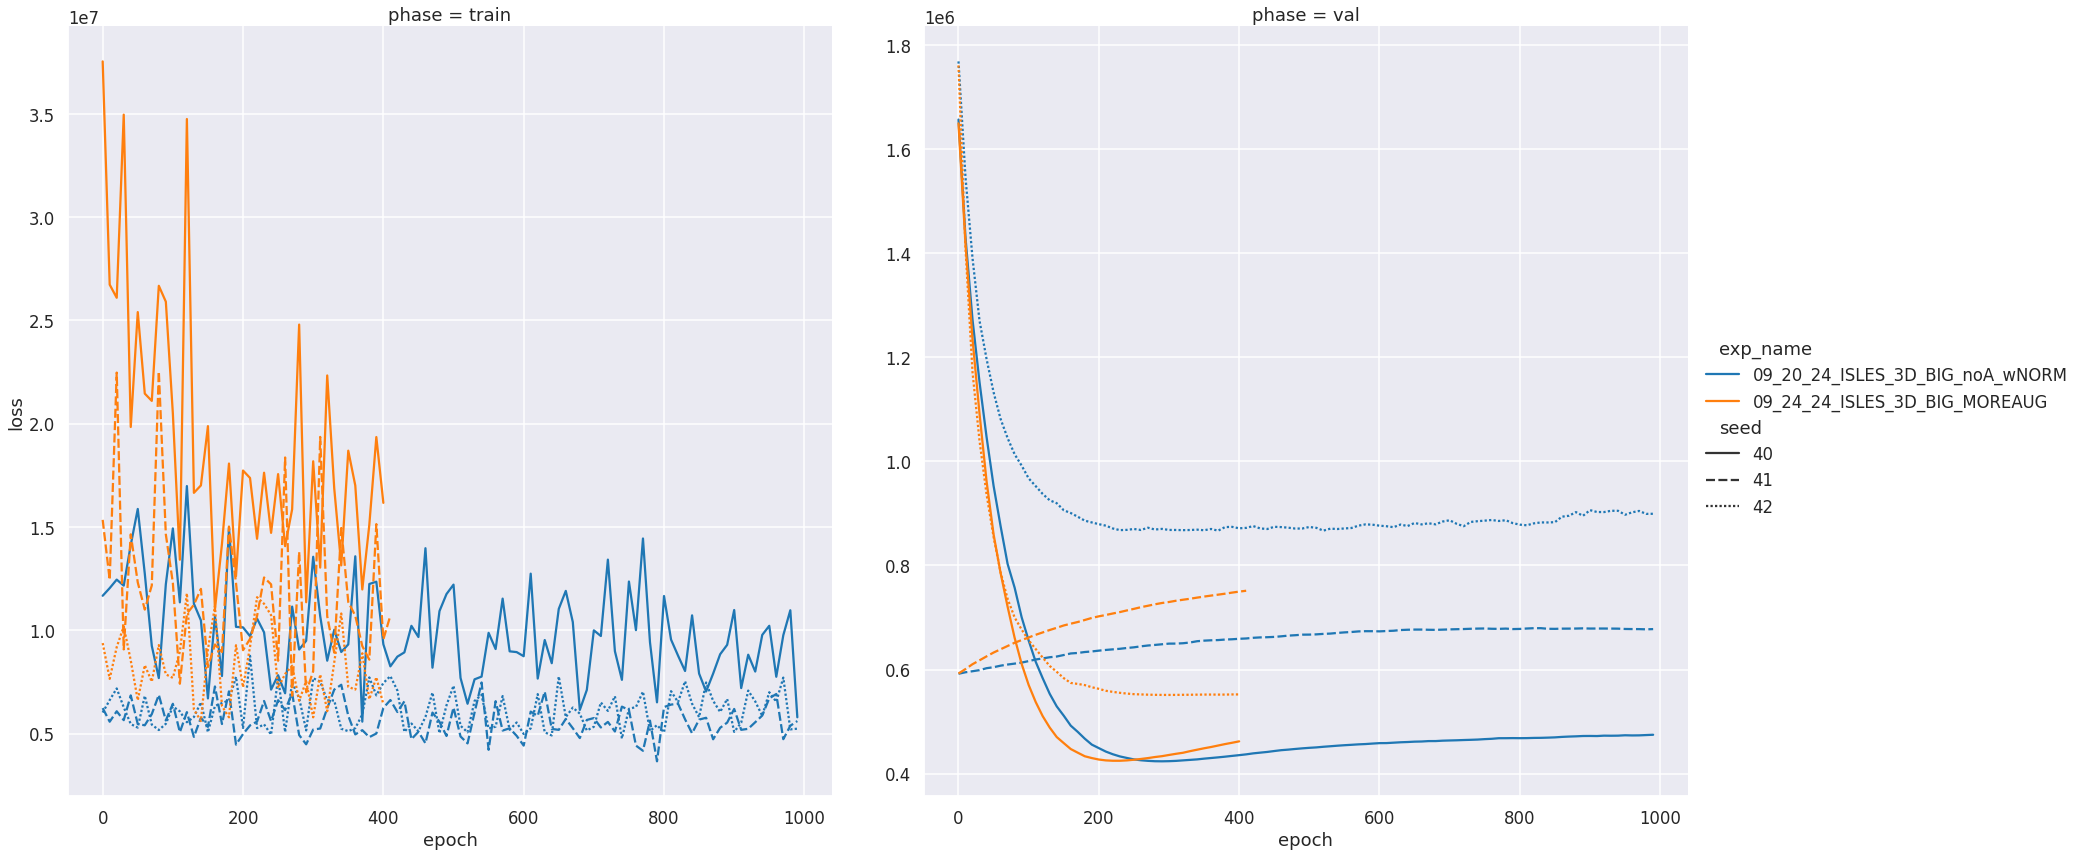

In [6]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='loss',
    hue='exp_name',
    # hue='error_type',
    style='seed',
    col='phase',
    kind='line',
    height=12,
    facet_kws=dict(sharey=False),
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.12)
# g.set(ylim=(0.0, 0.25))

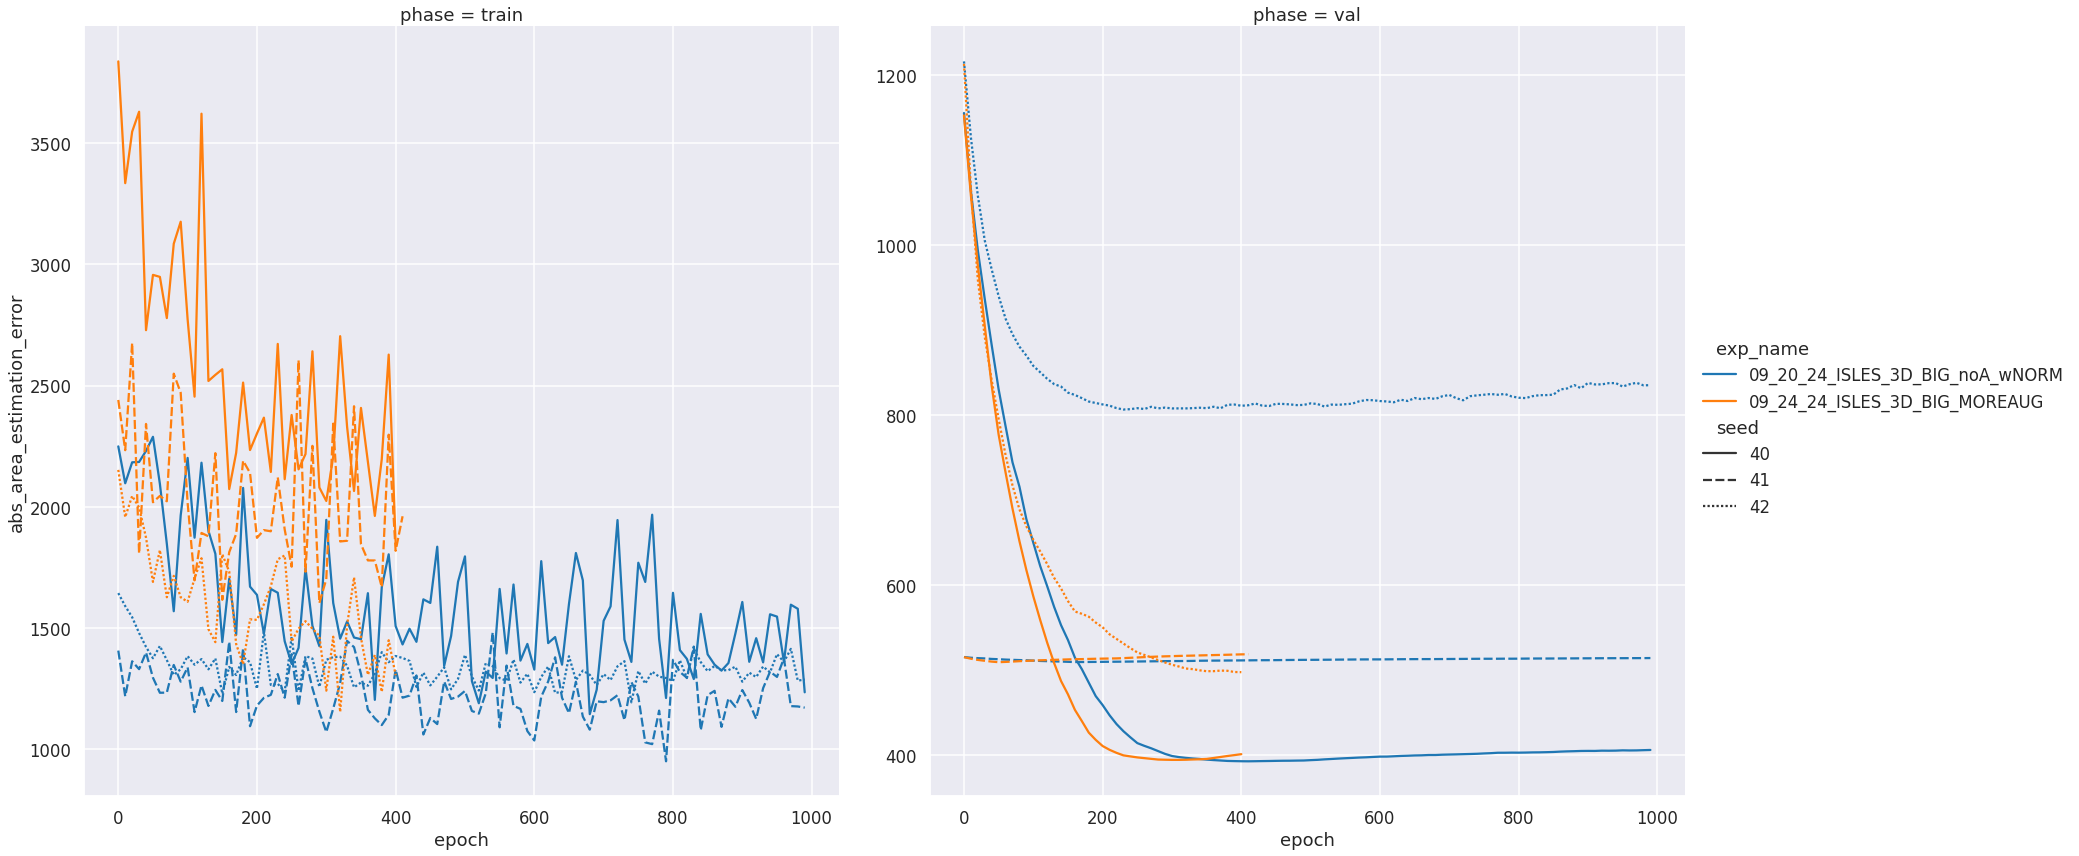

In [7]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='abs_area_estimation_error',
    hue='exp_name',
    style='seed',
    col='phase',
    kind='line',
    height=12,
    facet_kws=dict(sharey=False),
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.12)
# g.set(ylim=(0.0, 0.25))